IDENTIFY UNSUPERVISED BOUNDARY LAYER CLASSIFICATION
=================
Notebook to identify boundary layer types corresponding to the labels given by unsupervised classification.
Take in input the dataset generated by `blclassification.py`.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import netCDF4 as nc

from blcovid import utils
from blcovid import graphics

In [3]:
graphics.storeImages=False

In [4]:
rawlabelspath="../working-directories/2-unidentified-labels/UNIDFLABELS_2015_0219.PASSY2015_BT-T_linear_dz40_dt30_zmax2000.nc"

In [5]:
ncf = nc.Dataset(rawlabelspath)
z_common = np.array(ncf.variables['altitude'])
t_common = utils.slist2dtlist(np.array(ncf.variables['time']),dt.datetime(2015,2,19))
X_raw = np.array(ncf.variables['X_raw'])
rawlabl = np.array(ncf.variables['rawlabels'])

Vizualisation of clusters
-------------------------

### Original data

In [6]:
origdataDir='../working-directories/0-original-data/'

rawlabelsname = rawlabelspath.split('/')[-1]
prefx,prepkey,dotnc = rawlabelsname.split('.')
predictors,interp,Dz,Dt,zmax=utils.load_preparation_params(prepkey)

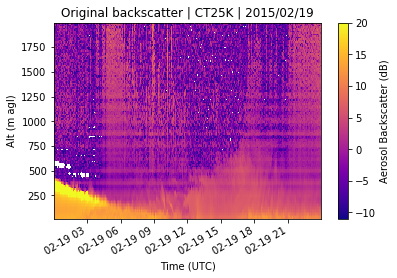

In [7]:
origdatafile='CEILOMETER/PASSY_PASSY_CNRM_CEILOMETER_CT25K_'+prefx[-9:]+'_V01.nc'
graphics.quicklook(origdataDir+origdatafile,altmax=zmax)

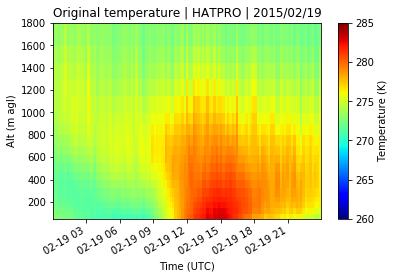

In [8]:
origdatafile='MWR/PASSY2015_SALLANCHES_CNRM_MWR_HATPRO_'+prefx[-9:]+'_V01.nc'
graphics.quicklook(origdataDir+origdatafile,altmax=zmax)

### Unsupervised clustering results

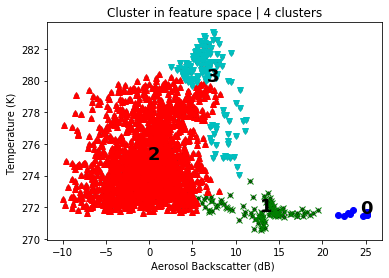

In [9]:
graphics.cluster2Dview(X_raw[:,0],predictors[0],X_raw[:,1],predictors[1],rawlabl,displayClustersIDs=True)

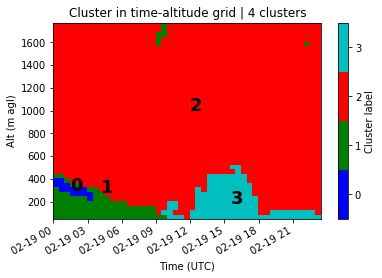

In [10]:
graphics.clusterZTview(t_common,z_common,rawlabl,displayClustersIDs=True)

Identify clusters
----------------
According to the two previous graphs, to what boundary layer types correspond the displayed labels?

Fill in the dictionary `EXPERT_IDENTIFICATION`:

In [12]:
EXPERT_IDENTIFICATION={0:"CL",
                      1:"SBL",
                      2:"FA",
                      3:"ML"}

In [13]:
boundary_layer_identified_types = {"CL":"Cloud",
                                  "SBL":"Stable boundary layer",
                                  "FA":"Free atmosphere",
                                  "ML":"Mixed layer"}

if not set(EXPERT_IDENTIFICATION.values()).issubset(boundary_layer_identified_types.keys()):
    raise ValueError("Unknown boundary layer type. If it is a new BL type, please add it to the dict 'boundary_layer_identified_types'")

Check assignment
-----------------

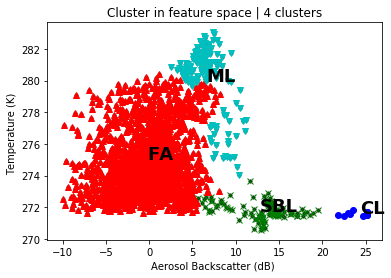

In [14]:
graphics.cluster2Dview(X_raw[:,0],predictors[0],X_raw[:,1],predictors[1],rawlabl,
            clustersIDs=EXPERT_IDENTIFICATION,displayClustersIDs=True)

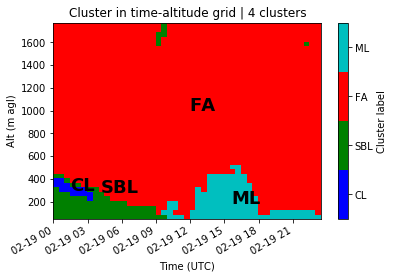

In [16]:
graphics.clusterZTview(t_common,z_common,rawlabl,
            clustersIDs=EXPERT_IDENTIFICATION,displayClustersIDs=True)

Save the assignation
-----------------------

In [16]:
labelled_dataset_path="../working-directories/3-identified-labels/IDFLABELS_2015_0219.PASSY2015_BT-T_linear_dz40_dt30_zmax2000.nc"

In [17]:
utils.add_idlabels_to_netcdf(rawlabelspath,labelled_dataset_path,EXPERT_IDENTIFICATION,boundary_layer_identified_types,quiet=False)

Identification of labels have been added in the netcdf file  ../working-directories/3-identified-labels/IDFLABELS_2015_0219.PASSY2015_BT-T_linear_dz40_dt30_zmax2000.nc
